In [41]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv('FinalProjectData/Study_D.csv')
df = df[df['LeadStatus'] != 'Flagged']

In [43]:
df[df['TxGroup'] == 'Control']

,Study,Country,PatientID,SiteID,RaterID,AssessmentID,TxGroup,VisitDay,P1,P2,...,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total,LeadStatus
52,D,China,40004,80001,120005,401069,Control,0,6,5,...,4,1,4,6,1,3,3,5,86,Assign to CS
53,D,China,40005,80001,120044,401426,Control,0,5,3,...,4,2,1,4,1,1,1,3,71,Assign to CS
54,D,China,40005,80001,120044,400022,Control,7,5,3,...,4,2,1,4,1,1,1,3,72,Assign to CS
55,D,China,40005,80001,120044,401742,Control,10,3,1,...,3,1,1,3,1,1,1,1,44,Assign to CS
56,D,China,40005,80001,120044,401766,Control,14,3,1,...,3,1,1,3,1,1,1,1,44,Assign to CS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,D,China,40222,80001,120050,402047,Control,19,5,2,...,3,1,1,6,2,3,2,2,71,Passed
2937,D,China,40222,80001,120050,401911,Control,32,4,1,...,2,1,1,5,2,2,1,2,60,Passed
2938,D,China,40222,80001,120050,402457,Control,60,4,1,...,2,1,1,4,1,1,1,2,46,Passed
2939,D,China,40222,80001,120050,401058,Control,74,3,1,...,1,1,1,4,1,1,1,3,48,Passed


In [44]:
df[df['TxGroup'] == 'Treatment']

,Study,Country,PatientID,SiteID,RaterID,AssessmentID,TxGroup,VisitDay,P1,P2,...,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total,LeadStatus
7,D,China,40001,80001,120031,400330,Treatment,79,2,2,...,2,1,2,3,3,2,2,2,62,Passed
15,D,China,40001,80001,120031,400270,Treatment,165,2,2,...,2,1,2,3,3,2,2,2,61,Assign to CS
31,D,China,40003,80001,120013,402159,Treatment,0,4,3,...,5,3,2,3,3,4,4,4,105,Assign to CS
32,D,China,40003,80001,120013,401948,Treatment,4,4,3,...,5,2,2,4,2,4,4,4,104,Assign to CS
33,D,China,40003,80001,120013,402580,Treatment,7,4,3,...,4,2,3,4,3,4,3,4,99,Assign to CS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,D,China,40220,80001,120032,401595,Treatment,163,1,1,...,2,1,1,1,2,1,2,1,38,Assign to CS
2915,D,China,40221,80001,120048,401715,Treatment,0,3,4,...,2,1,4,6,3,1,6,1,82,Assign to CS
2916,D,China,40221,80001,120048,402516,Treatment,14,3,4,...,2,1,4,6,3,1,6,4,82,Assign to CS
2918,D,China,40221,80001,120048,402727,Treatment,21,2,3,...,2,1,4,5,3,1,4,4,76,Assign to CS


In [45]:
df_panss = df[['PatientID', 'VisitDay', 'PANSS_Total']][df['TxGroup'] == 'Treatment']

In [46]:
df_panss

,PatientID,VisitDay,PANSS_Total
7,40001,79,62
15,40001,165,61
31,40003,0,105
32,40003,4,104
33,40003,7,99
...,...,...,...
2913,40220,163,38
2915,40221,0,82
2916,40221,14,82
2918,40221,21,76


In [47]:
df_panss_diff = pd.DataFrame(columns=['PatientID', 'PANSS_Total_Diff'])

for patient_id in df_panss['PatientID'].unique():
    patient_panss = df_panss[df_panss['PatientID'] == patient_id]
    patient_panss_diff = patient_panss.iloc[-1]['PANSS_Total'] - patient_panss.iloc[0]['PANSS_Total']
    df_panss_diff = df_panss_diff.append({'PatientID': patient_id, 'PANSS_Total_Diff': patient_panss_diff}, ignore_index=True)
    
df_panss_diff

,PatientID,PANSS_Total_Diff
0,40001,-1
1,40003,-61
2,40008,-44
3,40012,-56
4,40015,-5
...,...,...
91,40212,-48
92,40214,-30
93,40218,-21
94,40220,-56


In [48]:
df_panss_diff['Effective'] = df_panss_diff['PANSS_Total_Diff'] <= 0
df_panss_diff

,PatientID,PANSS_Total_Diff,Effective
0,40001,-1,True
1,40003,-61,True
2,40008,-44,True
3,40012,-56,True
4,40015,-5,True
...,...,...,...
91,40212,-48,True
92,40214,-30,True
93,40218,-21,True
94,40220,-56,True


True     88
False     8
Name: Effective, dtype: int64 

True     0.916667
False    0.083333
Name: Effective, dtype: float64


Text(0.5, 1.0, 'Treatment Group')

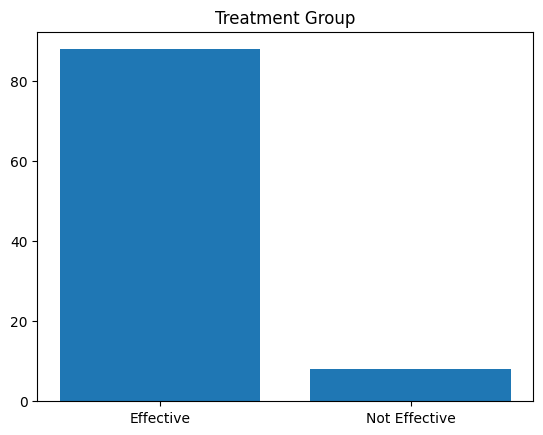

In [49]:
print(df_panss_diff['Effective'].value_counts(), '\n')
print(df_panss_diff['Effective'].value_counts(normalize=True))
plt.bar(['Effective', 'Not Effective'], [len(df_panss_diff[df_panss_diff['Effective'] == True]), len(df_panss_diff[df_panss_diff['Effective'] == False])])
plt.title('Treatment Group')

In [50]:
df_panss_control = df[['PatientID', 'VisitDay', 'PANSS_Total']][df['TxGroup'] == 'Control']

df_panss_control_diff = pd.DataFrame(columns=['PatientID', 'PANSS_Total_Diff'])

for patient_id in df_panss_control['PatientID'].unique():
    patient_panss = df_panss_control[df_panss_control['PatientID'] == patient_id]
    patient_panss_diff = patient_panss.iloc[-1]['PANSS_Total'] - patient_panss.iloc[0]['PANSS_Total']
    df_panss_control_diff = df_panss_control_diff.append({'PatientID': patient_id, 'PANSS_Total_Diff': patient_panss_diff}, ignore_index=True)
    
df_panss_control_diff

,PatientID,PANSS_Total_Diff
0,40004,0
1,40005,-37
2,40006,-36
3,40007,0
4,40009,0
...,...,...
84,40213,4
85,40215,-10
86,40216,0
87,40219,-53


In [51]:
df_panss_control_diff['Effective'] = df_panss_control_diff['PANSS_Total_Diff'] <= 0
df_panss_control_diff

,PatientID,PANSS_Total_Diff,Effective
0,40004,0,True
1,40005,-37,True
2,40006,-36,True
3,40007,0,True
4,40009,0,True
...,...,...,...
84,40213,4,False
85,40215,-10,True
86,40216,0,True
87,40219,-53,True


True     81
False     8
Name: Effective, dtype: int64 

True     0.910112
False    0.089888
Name: Effective, dtype: float64


Text(0.5, 1.0, 'Control Group')

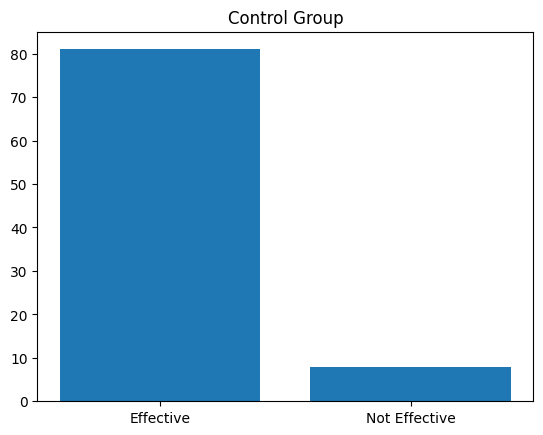

In [52]:
print(df_panss_control_diff['Effective'].value_counts(), '\n')
print(df_panss_control_diff['Effective'].value_counts(normalize=True))
plt.bar(['Effective', 'Not Effective'], [len(df_panss_control_diff[df_panss_control_diff['Effective'] == True]), len(df_panss_control_diff[df_panss_control_diff['Effective'] == False])])
plt.title('Control Group')

In [53]:
df_panss['PatientID'].value_counts()

40057    16
40174    16
40028    14
40176    14
40041    14
         ..
40183     1
40182     1
40177     1
40172     1
40090     1
Name: PatientID, Length: 96, dtype: int64

In [54]:
df_panss['PatientID'].value_counts()[df_panss['PatientID'].value_counts() >= 3]

40057    16
40174    16
40028    14
40176    14
40041    14
         ..
40197     3
40093     3
40124     3
40126     3
40128     3
Name: PatientID, Length: 76, dtype: int64

In [55]:
df_panss_effective = pd.DataFrame(columns=['PatientID', 'Effective'])

for patient_id in df_panss['PatientID'].value_counts()[df_panss['PatientID'].value_counts() >= 3].index:
    patient_panss = df_panss[df_panss['PatientID'] == patient_id]
    effective = False
    for i in range(len(patient_panss) - 2):
        if patient_panss.iloc[i]['PANSS_Total'] > patient_panss.iloc[i + 1]['PANSS_Total'] > patient_panss.iloc[i + 2]['PANSS_Total']:
            effective = True
            break
    df_panss_effective = df_panss_effective.append({'PatientID': patient_id, 'Effective': effective}, ignore_index=True)
    
df_panss_effective

,PatientID,Effective
0,40057,True
1,40174,True
2,40028,True
3,40176,True
4,40041,True
...,...,...
71,40197,True
72,40093,False
73,40124,False
74,40126,True


True     60
False    16
Name: Effective, dtype: int64 

True     0.789474
False    0.210526
Name: Effective, dtype: float64


Text(0.5, 1.0, 'Treatment Group')

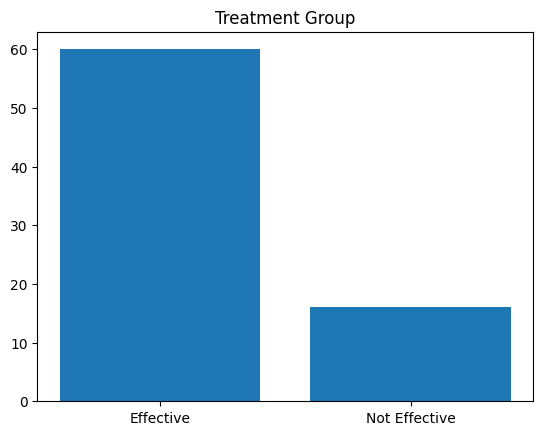

In [56]:
print(df_panss_effective['Effective'].value_counts(), '\n')
print(df_panss_effective['Effective'].value_counts(normalize=True))
plt.bar(['Effective', 'Not Effective'], [len(df_panss_effective[df_panss_effective['Effective'] == True]), len(df_panss_effective[df_panss_effective['Effective'] == False])])
plt.title('Treatment Group')

In [57]:
df_panss_control

,PatientID,VisitDay,PANSS_Total
52,40004,0,86
53,40005,0,71
54,40005,7,72
55,40005,10,44
56,40005,14,44
...,...,...,...
2936,40222,19,71
2937,40222,32,60
2938,40222,60,46
2939,40222,74,48


In [58]:
df_panss_control['PatientID'].value_counts()

40141    15
40005    14
40006    12
40019    12
40149    11
         ..
40163     1
40052     1
40040     1
40043     1
40004     1
Name: PatientID, Length: 89, dtype: int64

In [59]:
df_panss_control['PatientID'].value_counts()[df_panss_control['PatientID'].value_counts() >= 3]

df_panss_control_effective = pd.DataFrame(columns=['PatientID', 'Effective'])

for patient_id in df_panss_control['PatientID'].value_counts()[df_panss_control['PatientID'].value_counts() >= 3].index:
    patient_panss = df_panss_control[df_panss_control['PatientID'] == patient_id]
    effective = False
    for i in range(len(patient_panss) - 2):
        if patient_panss.iloc[i]['PANSS_Total'] > patient_panss.iloc[i + 1]['PANSS_Total'] > patient_panss.iloc[i + 2]['PANSS_Total']:
            effective = True
            break
    df_panss_control_effective = df_panss_control_effective.append({'PatientID': patient_id, 'Effective': effective}, ignore_index=True)
    
df_panss_control_effective

,PatientID,Effective
0,40141,True
1,40005,False
2,40006,True
3,40019,True
4,40149,True
...,...,...
65,40096,True
66,40060,True
67,40168,False
68,40013,False


True     55
False    15
Name: Effective, dtype: int64 

True     0.785714
False    0.214286
Name: Effective, dtype: float64


Text(0.5, 1.0, 'Control Group')

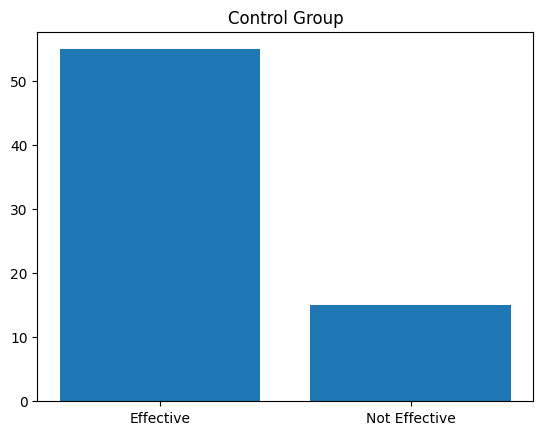

In [60]:
print(df_panss_control_effective['Effective'].value_counts(), '\n')
print(df_panss_control_effective['Effective'].value_counts(normalize=True))
plt.bar(['Effective', 'Not Effective'], [len(df_panss_control_effective[df_panss_control_effective['Effective'] == True]), len(df_panss_control_effective[df_panss_control_effective['Effective'] == False])])
plt.title('Control Group')